## INTRODUCTION ##
Im going to assume anyone seeing this has already installed anaconda and hence has python installed. Also Anaconda comes with some packages installed. I'll also assume that anyone seeing this has a prior knowledge of python programming, data analysis and data visualisation.
<p>Note: This notebook is based on University of Helsing's course, <a href= 'https://automating-gis-processes.github.io/site/'>Automating GIS Processes</a>. Please feel free to chck it out. Its really amazing
 <p> This Notebook will consist of 7 Lessons.
<ol>
    <li>Lesson 1: Shapely and Geometric Object</li>
    </ol>

In [1]:
"""
Installing Shapely:
Install Shapely like you would install any other python library. If the normal pip install doesnt work, then you can use 
conda install -c conda-forge shapely in the Anaconda prompt. The download will look like so
<
Or you could install from anaconda prompt using
pip install shapely (i recommend running the prompt as administrator, just incase you have 2 users on your pc)"""
!pip install shapely

# LESSON 1 #
### Geometric Objects ###
In space, everything is represented by 3 things, points, lines and Polygon. For example, A building (depending on map scale) can be represented by a point, a road can be represented with line and a large expanse of land can be represented by a Polygon. These 3 Objects are the 3 major Objects in Shapely as well. So we will go through them, how they are created, and well, objects in python has methods so we will examine the basic methods as well.

In [1]:
# Import Object libraries frm shapely
from shapely.geometry import Point, LineString, Polygon

In [2]:
# Create point objects
# Every point in space atleast 1 dimension. This is the coordinate (x,y). Could be in (Long, Lat),(UTM value), anything
# So shapely Point object also takes in 2 arguments. Which is the coordinate of the point
point1= Point(2.3, -1.2)
point2 = Point(5.7, 25.12)
point3= Point(7.3, -20.1)
# We can also create 3D objects. That is object with a height or depth
point3D = Point(7.3, -20.1, 5.6)

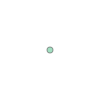

In [3]:
# We can view the point (ofcourse, it has no projection yet so its just arbitrary)
point1

In [4]:
# We can also print the actual coordinates
print(point2)
print(point3)
print(point3D) #NOTE: 3D points are represented with the capital letter Z

POINT (5.7 25.12)
POINT (7.3 -20.1)
POINT Z (7.3 -20.1 5.6)


In [5]:
# Ofcourse, we can print the type of object it is
# We can also print the geometric type of object the point is
# Note, this is applicable to all the shapely objects, Line, Polygon
print(type(point1))
point1.geom_type

<class 'shapely.geometry.point.Point'>


'Point'

In [6]:
# Point Attributes and Methods
#We can get the point coordinates
point_coords = point1.coords
print(point_coords)

# We can also print the type of point coordinate
print(type(point_coords))

# point_coords above is an object, meaning we can extract the coordinates in a list or tuple lke so
print(list(point_coords))


# We can get the xy value, or just x and y like so
xy = point_coords.xy
print(xy)

# We cna also just use
xy = point3D.xy
print(xy)

# This goes without saying that we can also just write it as
xy = point2.coords.xy
print(xy)

# We can get the x value
x = point1.x
print(x)

# We can get the y value
y = point1.y
print(y)

<class 'shapely.coords.CoordinateSequence'>
[(2.3, -1.2)]
(array('d', [2.3]), array('d', [-1.2]))
(array('d', [7.3]), array('d', [-20.1]))
(array('d', [5.7]), array('d', [25.12]))
2.3
-1.2


In [7]:
# We can calculate the area of the point (ofcourse, the area of a point is 0)
print(point1.area)

# We can also calculate the length of the point, which will also be 0
print(point2.length)

# W3 can also check the distance between 2 points
point1.distance(point2)

0.0
0.0


26.538696275439005

In [8]:
# LINESTRING 
# Line in space must have atleast 2Dimensons, which is the Coordinate and length meaning it must have a starting coordinate and an ending coordinate
# LineString in shapely takes a minimum of 2 points, i.e a list of tuples or tuple of tuples
# Ofcourse, we can also create the linestring using point coordinates
road1 = LineString([(2.1, -4.5), (3.4, -1.2), (5.4, -5.1)])
road2 = LineString(((1.2, 3.2), (2.5, -2.3), (4.3,-1.2)))
road3 = LineString([point1, point2, point3, point3D])
road4 = LineString([(4.5, 1.2, 3.4), (2.3, 4.6, 9.0), (5.6, -2.3, 5.5)])


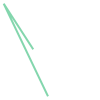

In [9]:
# Just like point, we can view the line
road4

In [10]:
point3D.xy

(array('d', [7.3]), array('d', [-20.1]))

In [11]:
# See the coordinates
print(road3)

# Get coordinates
road_coords = road1.xy
print(road_coords)

# road.y is a list, meaning,we can get the x and y by slicing the list
road_x = road_coords[0] # Gives a list of the x coordinates
print(road_x)

# Get the y coordinates
road_y = road2.xy[1]
print(road_y)

# Get geometric type
print(road2.geom_type)

# Get object type
print(type(road4))


LINESTRING (2.3 -1.2, 5.7 25.12, 7.3 -20.1, 7.3 -20.1)
(array('d', [2.1, 3.4, 5.4]), array('d', [-4.5, -1.2, -5.1]))
array('d', [2.1, 3.4, 5.4])
array('d', [3.2, -2.3, -1.2])
LineString
<class 'shapely.geometry.linestring.LineString'>


In [12]:
# Ofcourse we can check the length of the line
print(road4.length)

# We can also check the centroid
print(road3.centroid)

# We can also check th distance between lines
print(road3.distance(road2))

11.698220616652494
POINT (5.575783265582978 6.003539256096346)
0.05839107676658432


In [13]:
# Polygon 
# Polygon in space has 3 Dimensions with the third dmenson being volume. Meaning its a closed polygon. I.e, it ends at the coordinates it starts from
# Polygon object in shapely takes a list or tuples containing atleast 3 corrdinates i.e/ A list or tuple of atleast 3 tuples
world1 = Polygon([(1.2,-3.4), (2.3, -0.1), (4.4, -1.9)])
# It can also take a list of points
world2 = Polygon([point1, point2, point3, point3D])
#But it cannot take a line
try:
    world3 = Polygon([road4])
except:
    world3 = 'error, cant process'
# Ofcos we can just use list comprehension to extract the coordinates
world4 = Polygon([coord for coord in zip(road3.xy[0], road3.xy[1])])

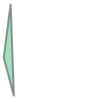

In [14]:
# View the polygon
world4

In [15]:
world3

'error, cant process'

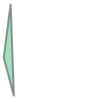

In [16]:
world2

In [17]:
# Check the geomtric type
print('Gemoteric type', world1.geom_type)

# Check the object type
print('Object type', type(world2))

Gemoteric type Polygon
Object type <class 'shapely.geometry.polygon.Polygon'>


In [18]:
# Polygon could also have a hole in it
world_has_a_hole = Polygon([(-180, 90), (-180, -90), (180, -90), (180, 90)], [[(-170, 80), (-170, -80), (170, -80), (170, 80)]])

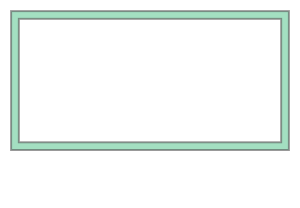

In [19]:
# The first list of coordinate is the outer bound
# The second list is the inner hole
# The second lst must be a list of list of tuples
# Ofcourse, we can represent these with points
world_has_a_hole

In [20]:
# We can check the area
print('world area', world1.area)
print('world has a hole area', world_has_a_hole.area)

# We can check the centroid
print('centroid:', world_has_a_hole.centroid)

# We can check the bounds
print('Bounds:', world_has_a_hole.bounds)

# We can also check the extrior
print('Exterior:', world_has_a_hole.exterior)

# WLength of the exterior bounds
print('Exterior length:', world_has_a_hole.exterior.length)

world area 4.455
world has a hole area 10400.0
centroid: POINT (-0 -0)
Bounds: (-180.0, -90.0, 180.0, 90.0)
Exterior: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Exterior length: 1080.0


I practice, we tend to work with variety of geometric object in space. For example, plotting a transportation map requires a collection of roads linked to each other, collection of buildings and other various structures. Shapely have provision for collections of geometric objects in form of MultiPoints, MultiLine, MultiPolygon

In [40]:
# Collection of Points
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon # Dont forget. Capital M, capital P
building_points = MultiPoint([point1, point2, point3])

# We can also run points attributes on MultiPoint object
print(building_points.area)
print(building_points.length)
print(building_points.bounds)

0.0
0.0
(2.3, -20.1, 7.3, 25.12)


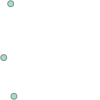

In [24]:
building_points

In [26]:
print(building_points)

MULTIPOINT (2.3 -1.2, 5.7 25.12, 7.3 -20.1)


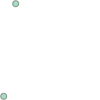

In [29]:
#We can slice a multipoint object
building_points[:2]

In [35]:
print(building_points[:2].wkt)

MULTIPOINT (2.3 -1.2, 5.7 25.12)


In [37]:
# Collection of Lines
street_roads = MultiLineString([road1, road2, road3, road4])

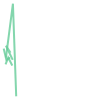

In [38]:
street_roads

In [39]:
# We can also run common object attributes
print(street_roads.length)
print(street_roads.area)
print(street_roads.geoms)

99.17601583932846
0.0


In [45]:
# MultiPolygon
areas = MultiPolygon([world2, world_has_a_hole])

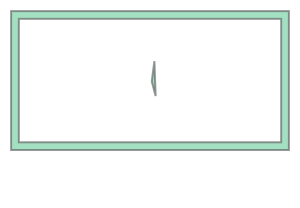

In [46]:
areas

This is the end of the first lesson. But as a test of knowledge, please check out 'Assignment_1.ipynb' and try to do it yourself. But if you are having any problem completing any part of the assignment, please check out the link to the answer given in the assignment